## 2024/24

### Part 1

--- Day 24: Crossed Wires ---

You and The Historians arrive at the edge of a large grove somewhere in the jungle. After the last incident, the Elves installed a small device that monitors the fruit. While The Historians search the grove, one of them asks if you can take a look at the monitoring device; apparently, it's been malfunctioning recently.

The device seems to be trying to produce a number through some boolean logic gates. Each gate has two inputs and one output. The gates all operate on values that are either true (1) or false (0).

- AND gates output 1 if both inputs are 1; if either input is 0, these gates output 0.
- OR gates output 1 if one or both inputs is 1; if both inputs are 0, these gates output 0.
- XOR gates output 1 if the inputs are different; if the inputs are the same, these gates output 0.

Gates wait until both inputs are received before producing output; wires can carry 0, 1 or no value at all. There are no loops; once a gate has determined its output, the output will not change until the whole system is reset. Each wire is connected to at most one gate output, but can be connected to many gate inputs.

Rather than risk getting shocked while tinkering with the live system, you write down all of the gate connections and initial wire values (your puzzle input) so you can consider them in relative safety. For example:

```
x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02
```

Because gates wait for input, some wires need to start with a value (as inputs to the entire system). The first section specifies these values. For example, x00: 1 means that the wire named x00 starts with the value 1 (as if a gate is already outputting that value onto that wire).

The second section lists all of the gates and the wires connected to them. For example, x00 AND y00 -> z00 describes an instance of an AND gate which has wires x00 and y00 connected to its inputs and which will write its output to wire z00.

In this example, simulating these gates eventually causes 0 to appear on wire z00, 0 to appear on wire z01, and 1 to appear on wire z02.

Ultimately, the system is trying to produce a number by combining the bits on all wires starting with z. z00 is the least significant bit, then z01, then z02, and so on.

In this example, the three output bits form the binary number 100 which is equal to the decimal number 4.

Here's a larger example:

```
x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj
```

After waiting for values on all wires starting with z, the wires in this system have the following values:

```
bfw: 1
bqk: 1
djm: 1
ffh: 0
fgs: 1
frj: 1
fst: 1
gnj: 1
hwm: 1
kjc: 0
kpj: 1
kwq: 0
mjb: 1
nrd: 1
ntg: 0
pbm: 1
psh: 1
qhw: 1
rvg: 0
tgd: 0
tnw: 1
vdt: 1
wpb: 0
z00: 0
z01: 0
z02: 0
z03: 1
z04: 0
z05: 1
z06: 1
z07: 1
z08: 1
z09: 1
z10: 1
z11: 0
z12: 0
```

Combining the bits from all wires starting with z produces the binary number 0011111101000. Converting this number to decimal produces 2024.

Simulate the system of gates and wires. What decimal number does it output on the wires starting with z?

To begin, get your puzzle input.

**AI Prompt**

I'm a skilled python developer, please help go consider various approaches for solving this problem and their pros/cons. I prefer simpler and understandable solutions, easily readable also for other developers. It's ok to generate code with testcases without explanation. I'll ask if I do not understand it. Always wrap test code into a function, to not clutter the global variable namespace.

**AI Response**

For this boolean logic circuit simulation, here are a few approaches we could consider:

1. Graph-based approach using networkx:
- Pros: Natural representation of the circuit, built-in topological sorting
- Cons: Might be overkill for this simple boolean logic

2. Simple dictionary-based simulation:
- Pros: Straightforward to implement, easy to read
- Cons: Need to handle dependencies manually

3. Class-based with Wire and Gate objects:
- Pros: Very clean OOP design
- Cons: More verbose, might be overengineering

Let's start with a simple test case using the dictionary approach, since it's the most straightforward. Would you like to see this implementation first?

In [ ]:
sample_input1 = """
x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02
""".strip()

In [ ]:
sample_input2 = """
x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj
""".strip()

**AI Prompt**

lets go for the graph with topological sorting

**AI Response**

Good choice! We can use networkx to build a directed graph where nodes represent wires and gates. Here's a starting implementation:

```python
import networkx as nx
from dataclasses import dataclass
from typing import Callable, Dict

def test_circuit_solver():
    def solve_circuit(input_text: str) -> int:
        # Split into initial values and gates
        parts = input_text.split('\n\n')
        initial_values = {}
        for line in parts[0].split('\n'):
            wire, value = line.split(': ')
            initial_values[wire] = int(value)
            
        # Create graph and add gates
        G = nx.DiGraph()
        gates = {}  # store gate operations
        
        for line in parts[1].split('\n'):
            inputs, output = line.split(' -> ')
            parts = inputs.split()
            
            if len(parts) == 3:  # binary gate
                in1, op, in2 = parts
                gates[output] = (op, in1, in2)
                G.add_edges_from([(in1, output), (in2, output)])
            
        # Verify it's a DAG and get evaluation order
        if not nx.is_directed_acyclic_graph(G):
            raise ValueError("Circuit contains cycles")
            
        order = list(nx.topological_sort(G))
        
        # Evaluate circuit
        values = initial_values.copy()
        
        def evaluate_gate(op: str, in1: str, in2: str) -> int:
            v1, v2 = values[in1], values[in2]
            if op == 'AND': return v1 & v2
            if op == 'OR': return v1 | v2
            if op == 'XOR': return v1 ^ v2
            raise ValueError(f"Unknown operation: {op}")
            
        for wire in order:
            if wire in gates:
                op, in1, in2 = gates[wire]
                values[wire] = evaluate_gate(op, in1, in2)
                
        # Combine z-wires to get final number
        z_wires = sorted([w for w in values if w.startswith('z')])
        result = 0
        for wire in z_wires:
            result = (result << 1) | values[wire]
            
        return result

    assert solve_circuit(sample_input1) == 4
    assert solve_circuit(sample_input2) == 2024
    print("All tests passed!")

test_circuit_solver()
```

This implementation:
1. Uses networkx for dependency management and topological sorting
2. Creates a DAG where edges represent data flow between wires
3. Evaluates gates in topological order to ensure all inputs are available
4. Uses bitwise operations for gate evaluation

Would you like me to explain any part in more detail or shall we proceed with optimizations/improvements?

In [ ]:
import networkx as nx
from dataclasses import dataclass
from typing import Callable, Dict


def parse(input_text):
    # Split into initial values and gates
    parts = input_text.split('\n\n')
    initial_values: dict[str, int] = {}
    for line in parts[0].split('\n'):
        wire, value = line.split(': ')
        initial_values[wire] = int(value)
        
    gates: list[tuple[str, str, str]] = []
    for line in parts[1].split('\n'):
        inputs, output = line.split(' -> ')
        parts = inputs.split()
        
        if len(parts) == 3:  # binary gate
            in1, op, in2 = parts
            gates.append((op, in1, in2, output))

    return gates, initial_values


def build_graph(gates: list[tuple[str,str,str,str]]):
    # Create graph and add gates
    G = nx.DiGraph()

    # Add all nodes and edges
    for op, in1, in2, output in gates:
        G.add_edges_from([(in1, output), (in2, output)])
        G.add_node(output, op=op)
        
    # Verify it's a DAG and get evaluation order
    if not nx.is_directed_acyclic_graph(G):
        raise ValueError("Circuit contains cycles")

    return G

    
print(parse(sample_input1))
print(parse(sample_input2))

([('AND', 'x00', 'y00', 'z00'), ('XOR', 'x01', 'y01', 'z01'), ('OR', 'x02', 'y02', 'z02')], {'x00': 1, 'x01': 1, 'x02': 1, 'y00': 0, 'y01': 1, 'y02': 0})
([('XOR', 'ntg', 'fgs', 'mjb'), ('OR', 'y02', 'x01', 'tnw'), ('OR', 'kwq', 'kpj', 'z05'), ('OR', 'x00', 'x03', 'fst'), ('XOR', 'tgd', 'rvg', 'z01'), ('OR', 'vdt', 'tnw', 'bfw'), ('AND', 'bfw', 'frj', 'z10'), ('OR', 'ffh', 'nrd', 'bqk'), ('AND', 'y00', 'y03', 'djm'), ('OR', 'y03', 'y00', 'psh'), ('OR', 'bqk', 'frj', 'z08'), ('OR', 'tnw', 'fst', 'frj'), ('AND', 'gnj', 'tgd', 'z11'), ('XOR', 'bfw', 'mjb', 'z00'), ('OR', 'x03', 'x00', 'vdt'), ('AND', 'gnj', 'wpb', 'z02'), ('AND', 'x04', 'y00', 'kjc'), ('OR', 'djm', 'pbm', 'qhw'), ('AND', 'nrd', 'vdt', 'hwm'), ('AND', 'kjc', 'fst', 'rvg'), ('OR', 'y04', 'y02', 'fgs'), ('AND', 'y01', 'x02', 'pbm'), ('OR', 'ntg', 'kjc', 'kwq'), ('XOR', 'psh', 'fgs', 'tgd'), ('XOR', 'qhw', 'tgd', 'z09'), ('OR', 'pbm', 'djm', 'kpj'), ('XOR', 'x03', 'y03', 'ffh'), ('XOR', 'x00', 'y04', 'ntg'), ('OR', 'bfw', 'bq

In [ ]:
sample_graph1 = build_graph(parse(sample_input1)[0])
sample_initial_values1 = parse(sample_input1)[1]

sample_graph2 = build_graph(parse(sample_input2)[0])
sample_initial_values2 = parse(sample_input2)[1]

print(sorted(sample_graph2.nodes(data=True)))

[('bfw', {'op': 'OR'}), ('bqk', {'op': 'OR'}), ('djm', {'op': 'AND'}), ('ffh', {'op': 'XOR'}), ('fgs', {'op': 'OR'}), ('frj', {'op': 'OR'}), ('fst', {'op': 'OR'}), ('gnj', {'op': 'OR'}), ('hwm', {'op': 'AND'}), ('kjc', {'op': 'AND'}), ('kpj', {'op': 'OR'}), ('kwq', {'op': 'OR'}), ('mjb', {'op': 'XOR'}), ('nrd', {'op': 'OR'}), ('ntg', {'op': 'XOR'}), ('pbm', {'op': 'AND'}), ('psh', {'op': 'OR'}), ('qhw', {'op': 'OR'}), ('rvg', {'op': 'AND'}), ('tgd', {'op': 'XOR'}), ('tnw', {'op': 'OR'}), ('vdt', {'op': 'OR'}), ('wpb', {'op': 'XOR'}), ('x00', {}), ('x01', {}), ('x02', {}), ('x03', {}), ('x04', {}), ('y00', {}), ('y01', {}), ('y02', {}), ('y03', {}), ('y04', {}), ('z00', {'op': 'XOR'}), ('z01', {'op': 'XOR'}), ('z02', {'op': 'AND'}), ('z03', {'op': 'AND'}), ('z04', {'op': 'XOR'}), ('z05', {'op': 'OR'}), ('z06', {'op': 'OR'}), ('z07', {'op': 'OR'}), ('z08', {'op': 'OR'}), ('z09', {'op': 'XOR'}), ('z10', {'op': 'AND'}), ('z11', {'op': 'AND'}), ('z12', {'op': 'XOR'})]


**AI Prompt**

load full aoc data

**AI Response**

I'll help you load the actual puzzle input using the advent-of-code-data library:

```python
from aocd import get_data
data = get_data(year=2024, day=24)

# Let's verify the format is as expected
gates, initial_values = parse(data)
G = build_graph(gates, initial_values)
print(f"Graph has {len(G.nodes)} nodes and {len(G.edges)} edges")
```

Would you like to proceed with implementing the circuit evaluation on this graph?

In [ ]:
from aocd import get_data

full_input = get_data(year=2024, day=24)
full_graph = build_graph(parse(full_input)[0])
full_initial_values = parse(full_input)[1]

**AI Prompt**

draw graph built using `build_graph`

**AI Response**

Let's modify the `build_graph` function to visualize the graph using networkx's drawing capabilities:

```python
def build_and_draw_graph(gates: list[tuple[str,str,str]], initial_values: dict[str, int]):
    G = nx.DiGraph()
    
    # Add all nodes and edges
    for op, in1, in2, output in gates:
        G.add_edges_from([(in1, output), (in2, output)])
    
    # Add initial value nodes
    for wire in initial_values:
        if wire not in G:
            G.add_node(wire)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos)
    
    plt.title("Circuit Graph")
    plt.axis('off')
    plt.show()
    
    return G

# Test with sample input
gates, initial_values = parse(sample_input1)
G = build_and_draw_graph(gates, initial_values)
```

This will create a visualization of the circuit's data flow. Would you like to try it and see if it helps understand the circuit structure?

In [ ]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<ipython-input-1-16caa2820170>:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


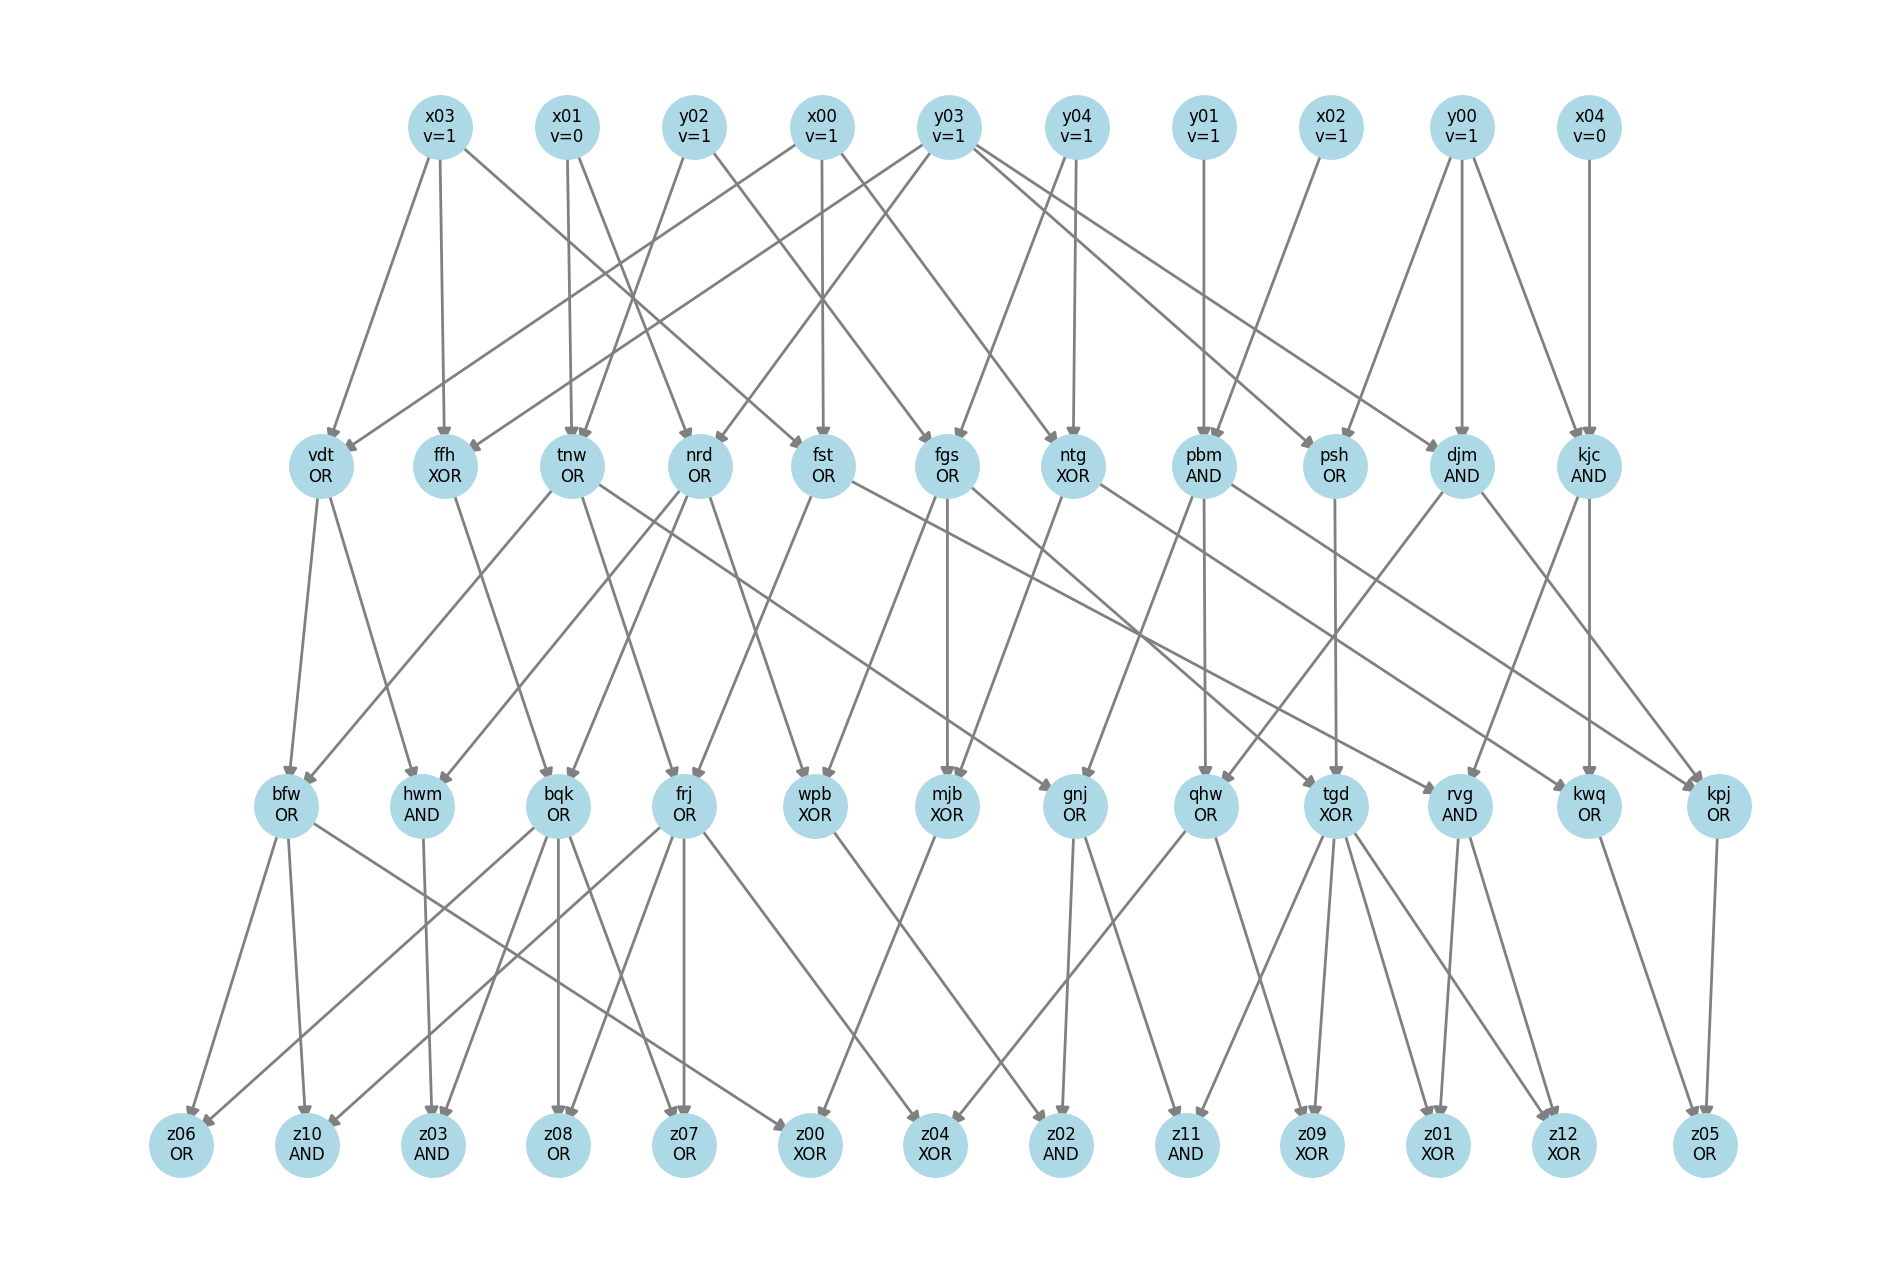

In [ ]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def draw_graph(G: nx.DiGraph, values: dict[str, int]):
    # Draw the graph
    plt.figure(figsize=(12, 8))
    # pos = nx.spring_layout(G, k=1, iterations=50)
    pos = graphviz_layout(G, prog="dot")
    
    def node_label(node):
        label, attrs = node
        ret = [label]
        if attrs.get('op'):
            ret.append(attrs['op'])
        if values.get(label) is not None:
            ret.append(f"v={values[label]}")
        return '\n'.join(ret)    
    node_labels = {n[0]: node_label(n) for n in G.nodes(data=True)}
        
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=6)
    # nx.draw_networkx_edge_labels(
    #     G, pos, 
    #     edge_labels={(e[0], e[1]): e[2]['op'] for e in G.edges(data=True) if e[2].get('op')},
    #     font_size=8,
    # )
    plt.axis('off')
    plt.show()
    
    return G

# Test with sample input
def test_build_graph(text_input):
    gates, initial_values = parse(text_input)
    G = build_graph(gates)
    # print(G.nodes(data=True))
    # print(G.edges(data=True))
    draw_graph(G, initial_values)

test_build_graph(sample_input2)

In [ ]:
def evaluate_gate(op: str, v1: int, v2: int) -> int:
    if op == 'AND': return v1 & v2
    if op == 'OR': return v1 | v2
    if op == 'XOR': return v1 ^ v2
    raise ValueError(f"Unknown operation: {op}")
    
def evaluate_graph(G: nx.DiGraph, values: dict[str, int]):
    order = list(nx.topological_sort(G))
    #print(order)

    for n in order:
        val = values.get(n)
        if val is not None:
            continue

        #print("n", n)
        op = G.nodes[n].get("op")
        #print("op", op)
        assert op, f"Missing op for node {n}"

        in12 = list(G.predecessors(n))
        assert len(in12)==2, f"Node {n} has not 2 operands"
        in1, in2 = in12
        val1 = values.get(in1)
        val2 = values.get(in2)
        assert val1 is not None, f"Missing value of {in1}"
        assert val2 is not None, f"Missing value of {in2}"
        val = evaluate_gate(op, val1, val2)
        values[n] = val

    z_nodes = sorted([
        (n,v) for n,v in values.items() if n.startswith('z')
    ], reverse=True)
    #print(z_nodes)

    # Combine z-nodes to get final number
    result = 0
    for zn, zn_val in z_nodes:
        result = (result << 1) | zn_val
        
    return result

def test_evaluate_graph():
    assert evaluate_graph(sample_graph1, sample_initial_values1) == 4
    assert evaluate_graph(sample_graph2, sample_initial_values2) == 2024
    print("all tests passed")

test_evaluate_graph()

all tests passed


In [ ]:
def solve_part1():
    return evaluate_graph(full_graph, full_initial_values)

solve_part1()

65740327379952

that was correct answer

### Part 2

--- Part Two ---
After inspecting the monitoring device more closely, you determine that the system you're simulating is trying to add two binary numbers.

Specifically, it is treating the bits on wires starting with x as one binary number, treating the bits on wires starting with y as a second binary number, and then attempting to add those two numbers together. The output of this operation is produced as a binary number on the wires starting with z. (In all three cases, wire 00 is the least significant bit, then 01, then 02, and so on.)

The initial values for the wires in your puzzle input represent just one instance of a pair of numbers that sum to the wrong value. Ultimately, any two binary numbers provided as input should be handled correctly. That is, for any combination of bits on wires starting with x and wires starting with y, the sum of the two numbers those bits represent should be produced as a binary number on the wires starting with z.

For example, if you have an addition system with four x wires, four y wires, and five z wires, you should be able to supply any four-bit number on the x wires, any four-bit number on the y numbers, and eventually find the sum of those two numbers as a five-bit number on the z wires. One of the many ways you could provide numbers to such a system would be to pass 11 on the x wires (1011 in binary) and 13 on the y wires (1101 in binary):

```
x00: 1
x01: 1
x02: 0
x03: 1
y00: 1
y01: 0
y02: 1
y03: 1
```

If the system were working correctly, then after all gates are finished processing, you should find 24 (11+13) on the z wires as the five-bit binary number 11000:

```
z00: 0
z01: 0
z02: 0
z03: 1
z04: 1
```

Unfortunately, your actual system needs to add numbers with many more bits and therefore has many more wires.

Based on forensic analysis of scuff marks and scratches on the device, you can tell that there are exactly four pairs of gates whose output wires have been swapped. (A gate can only be in at most one such pair; no gate's output was swapped multiple times.)

For example, the system below is supposed to find the bitwise AND of the six-bit number on x00 through x05 and the six-bit number on y00 through y05 and then write the result as a six-bit number on z00 through z05:

```
x00: 0
x01: 1
x02: 0
x03: 1
x04: 0
x05: 1
y00: 0
y01: 0
y02: 1
y03: 1
y04: 0
y05: 1

x00 AND y00 -> z05
x01 AND y01 -> z02
x02 AND y02 -> z01
x03 AND y03 -> z03
x04 AND y04 -> z04
x05 AND y05 -> z00
```

However, in this example, two pairs of gates have had their output wires swapped, causing the system to produce wrong answers. The first pair of gates with swapped outputs is x00 AND y00 -> z05 and x05 AND y05 -> z00; the second pair of gates is x01 AND y01 -> z02 and x02 AND y02 -> z01. Correcting these two swaps results in this system that works as intended for any set of initial values on wires that start with x or y:

```
x00 AND y00 -> z00
x01 AND y01 -> z01
x02 AND y02 -> z02
x03 AND y03 -> z03
x04 AND y04 -> z04
x05 AND y05 -> z05
```

In this example, two pairs of gates have outputs that are involved in a swap. By sorting their output wires' names and joining them with commas, the list of wires involved in swaps is z00,z01,z02,z05.

Of course, your actual system is much more complex than this, and the gates that need their outputs swapped could be anywhere, not just attached to a wire starting with z. If you were to determine that you need to swap output wires aaa with eee, ooo with z99, bbb with ccc, and aoc with z24, your answer would be aaa,aoc,bbb,ccc,eee,ooo,z24,z99.

Your system of gates and wires has four pairs of gates which need their output wires swapped - eight wires in total. Determine which four pairs of gates need their outputs swapped so that your system correctly performs addition; what do you get if you sort the names of the eight wires involved in a swap and then join those names with commas?

**AI Prompt**

please outline plan

**AI Response**

Here's a proposed plan to solve Part 2:

1. Verify our understanding:
   - The circuit should perform binary addition
   - Four pairs of gates have their outputs swapped (8 wires total)
   - When fixed, it should work for any input values

2. Analysis approach:
   - For any input values (x and y wires), we know what the correct output should be (simple binary addition)
   - We can compare expected vs actual output to identify incorrect gates
   - Need to find patterns where outputs are consistently wrong

3. Implementation steps:
   1. Create test cases with different x,y inputs and their expected z outputs
   2. Build function to verify if circuit performs correct addition
   3. Implement a way to test different wire swaps
   4. Find combinations of 4 wire pairs that make the circuit work correctly

Would you like me to proceed with implementing any of these steps?

**AI Prompt**

update evaluate_graph with parameter `swaps: set[tuple[str, str]]` of node/wire swap pairs

**AI Response**

Here's an updated version of `evaluate_graph` that handles wire swaps:

```python
def evaluate_graph(G: nx.DiGraph, values: dict[str, int], swaps: set[tuple[str, str]] = set()):
    # Create a mapping for swapped outputs
    swap_map = {}
    for a,b in swaps:
        swap_map[a] = b
        swap_map[b] = a
        
    order = list(nx.topological_sort(G))
    results = values.copy()  # Don't modify input values

    for n in order:
        val = results.get(n)
        if val is not None:
            continue

        op = G.nodes[n].get("op")
        assert op, f"Missing op for node {n}"

        # Get actual input nodes, considering swaps
        in12 = [swap_map.get(p, p) for p in G.predecessors(n)]
        assert len(in12)==2, f"Node {n} has not 2 operands"
        in1, in2 = in12
        
        val1 = results.get(in1)
        val2 = results.get(in2)
        assert val1 is not None, f"Missing value of {in1}"
        assert val2 is not None, f"Missing value of {in2}"
        val = evaluate_gate(op, val1, val2)
        results[n] = val

    # Get z-nodes in order, considering swaps
    z_nodes = sorted([
        (swap_map.get(n,n), v) for n,v in results.items() if n.startswith('z')
    ], reverse=True)

    # Combine z-nodes to get final number
    result = 0
    for zn, zn_val in z_nodes:
        result = (result << 1) | zn_val
        
    return result

def test_evaluate_graph():
    # Test original functionality still works
    assert evaluate_graph(sample_graph1, sample_initial_values1) == 4
    assert evaluate_graph(sample_graph2, sample_initial_values2) == 2024
    
    # TODO: Add test with swaps when we have a test case
    print("all tests passed")

test_evaluate_graph()
```

Would you like me to explain any part of this implementation or shall we proceed with creating test cases for wire swaps?

In [ ]:
def evaluate_graph(G: nx.DiGraph, values: dict[str, int], swaps: set[tuple[str, str]] = set()) -> dict[str, int]:
    # Create a mapping for swapped outputs
    swap_map = {}
    for a,b in swaps:
        swap_map[a] = b
        swap_map[b] = a
        
    order = list(nx.topological_sort(G))
    results = values.copy()  # Don't modify input values

    for n in order:
        val = results.get(n)
        if val is not None:
            continue

        op = G.nodes[n].get("op")
        assert op, f"Missing op for node {n}"

        # Get actual input nodes, considering swaps
        in12 = [swap_map.get(p, p) for p in G.predecessors(n)]
        assert len(in12)==2, f"Node {n} has not 2 operands"
        in1, in2 = in12
        
        val1 = results.get(in1)
        val2 = results.get(in2)
        assert val1 is not None, f"Missing value of {in1}"
        assert val2 is not None, f"Missing value of {in2}"
        val = evaluate_gate(op, val1, val2)
        results[n] = val

    return {
        swap_map.get(n,n): v for n,v in results.items()
    }

def evalute_graph_to_int(G: nx.DiGraph, values: dict[str, int], swaps: set[tuple[str, str]] = set()):
    z_values = evaluate_graph(G, values, swaps)
    z_nodes = sorted([(n, v) for n,v in z_values.items() if n.startswith('z')], reverse=True)

    # Combine z-nodes to get final number
    result = 0
    for zn, zn_val in z_nodes:
        result = (result << 1) | zn_val
        
    return result

def test_evaluate_graph():
    # Test original functionality still works
    assert evalute_graph_to_int(sample_graph1, sample_initial_values1) == 4
    assert evalute_graph_to_int(sample_graph2, sample_initial_values2) == 2024
    
    # TODO: Add test with swaps when we have a test case
    print("all tests passed")

test_evaluate_graph()

all tests passed


<ipython-input-1-16caa2820170>:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


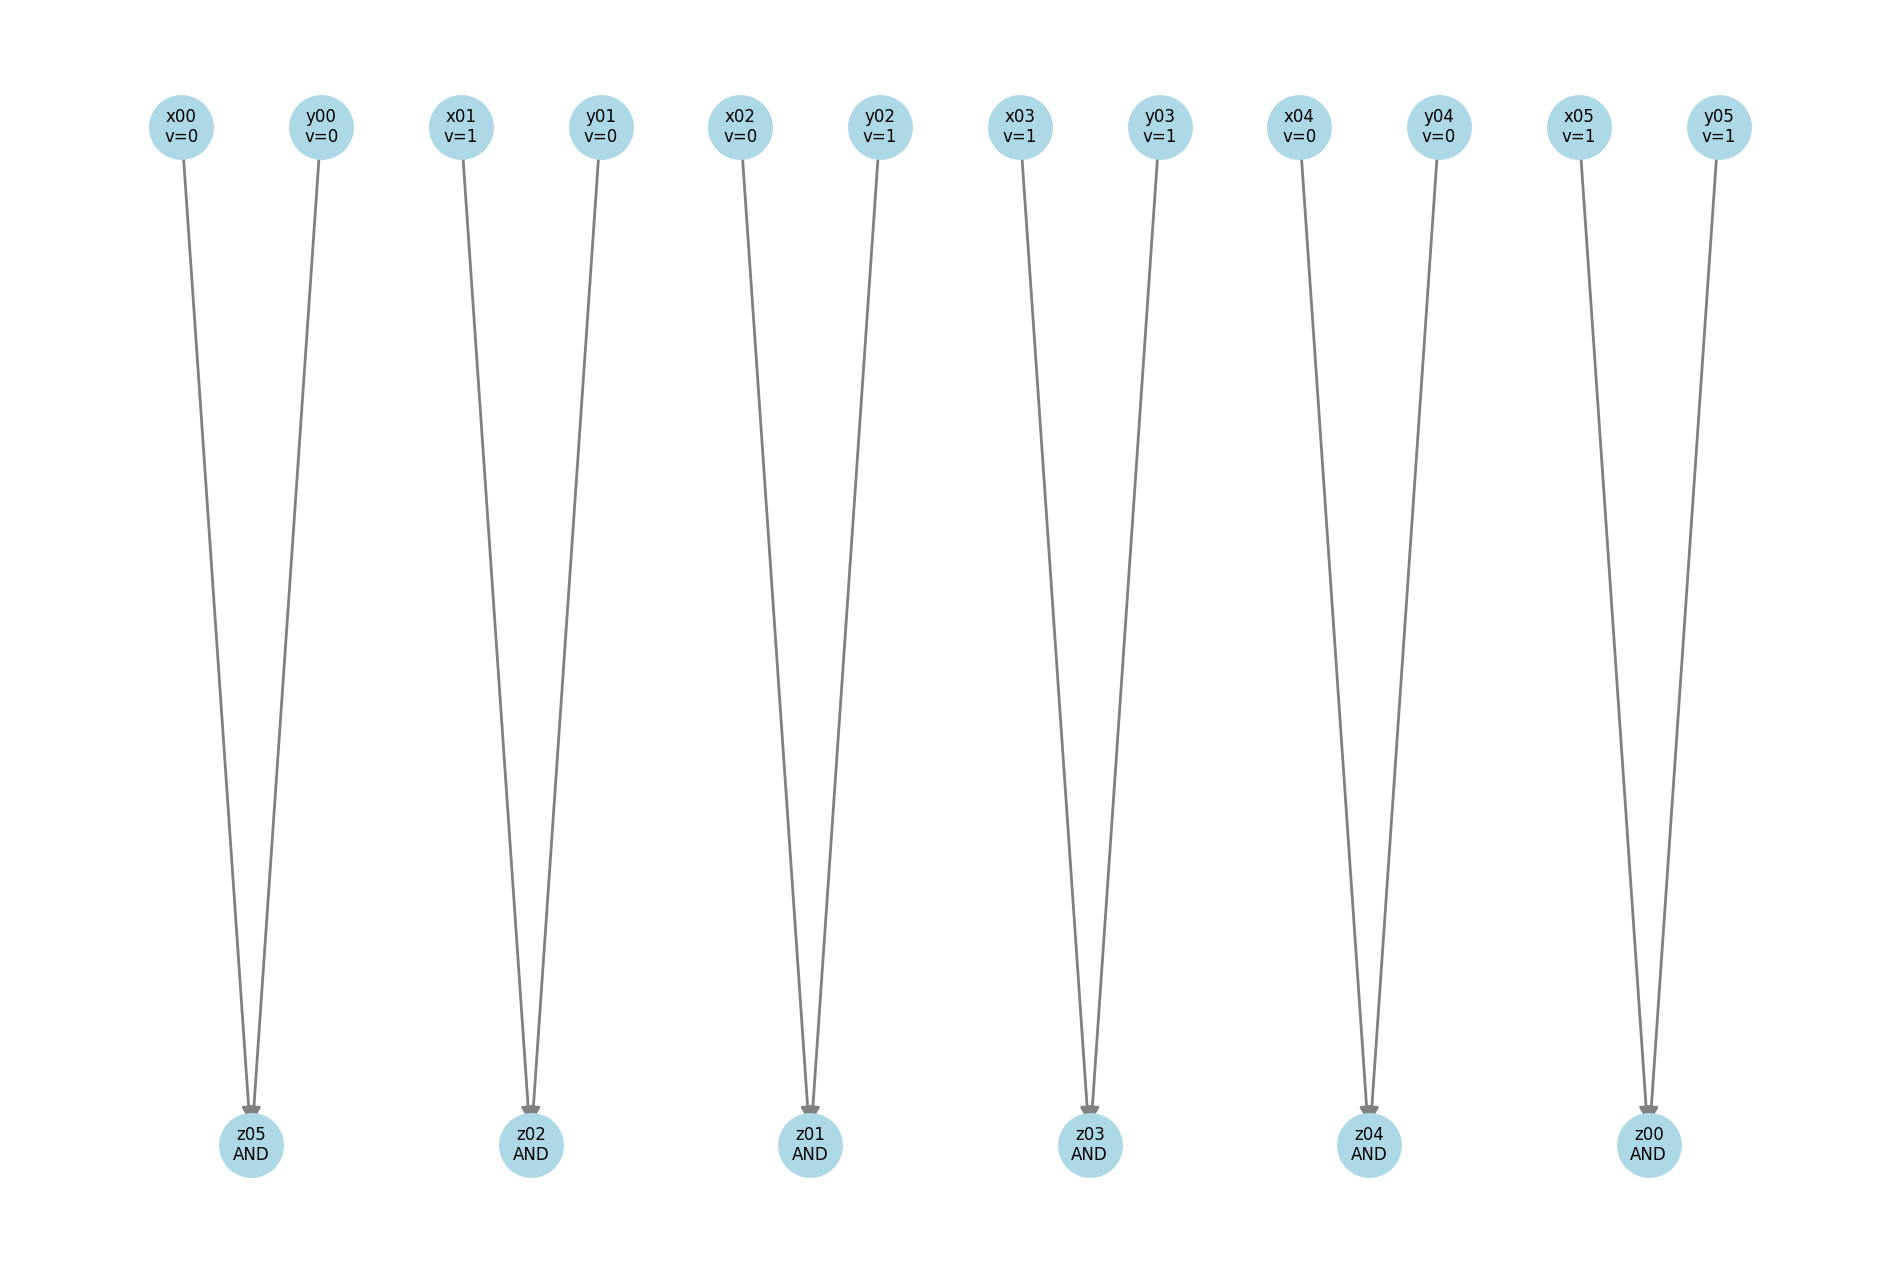

In [ ]:
sample_input3 = """
x00: 0
x01: 1
x02: 0
x03: 1
x04: 0
x05: 1
y00: 0
y01: 0
y02: 1
y03: 1
y04: 0
y05: 1

x00 AND y00 -> z05
x01 AND y01 -> z02
x02 AND y02 -> z01
x03 AND y03 -> z03
x04 AND y04 -> z04
x05 AND y05 -> z00
""".strip()
sample_graph3 = build_graph(parse(sample_input3)[0])
sample_initial_values3 = parse(sample_input3)[1]
assert evalute_graph_to_int(sample_graph3, sample_initial_values3, swaps={('z05','z00'),('z02','z01')}) == 2**5 + 2**3
draw_graph(sample_graph3, sample_initial_values3)

**AI Prompt**

- generate 100 pairs of x, y binary inputs
- compute results using evaluate_graph
- compare with correct result bits
- output set of bit indices where result was incorrect

**AI Response**

Here's code to analyze patterns of incorrect bits across multiple test cases:

```python
def generate_test_cases(n_bits: int, n_cases: int):
    import random
    random.seed(42)  # for reproducibility
    cases = []
    for _ in range(n_cases):
        x = random.getrandbits(n_bits)
        y = random.getrandbits(n_bits)
        cases.append((x, y))
    return cases

def analyze_circuit(G: nx.DiGraph, n_bits: int, cases):
    wrong_bits = set()
    
    for x,y in cases:
        # Create input values
        values = {}
        for i in range(n_bits):
            values[f'x{i:02d}'] = (x >> i) & 1
            values[f'y{i:02d}'] = (y >> i) & 1
            
        # Get circuit output
        result = evaluate_graph(G, values)
        
        # Compare with expected
        expected = x + y
        for i in range(n_bits + 1):  # +1 for carry bit
            expected_bit = (expected >> i) & 1
            result_bit = (result >> i) & 1
            if expected_bit != result_bit:
                wrong_bits.add(i)
                
    return wrong_bits

# Determine number of bits from input names
n_bits = max(int(n[1:]) for n in full_initial_values if n.startswith('x')) + 1
print(f"Circuit has {n_bits} input bits")

# Generate and analyze test cases
cases = generate_test_cases(n_bits, 100)
wrong_bits = analyze_circuit(full_graph, n_bits, cases)
print(f"Bits that are consistently wrong: {sorted(wrong_bits)}")
```

This will help us identify which output bits are wrong. Would you like me to explain any part or shall we proceed with analyzing the results?

In [ ]:
def get_ancestors(G: nx.Graph, nodes: str | set[str]) -> set[str]:
    nodes = {nodes} if isinstance(nodes, str) else nodes
    
    ancestors = set()
    for n in nodes:
        ancestors.update(nx.ancestors(G, n))
    ancestors.update(nodes)
    return ancestors

def get_descendants(G: nx.Graph, nodes: str | set[str]) -> set[str]:
    nodes = {nodes} if isinstance(nodes, str) else nodes

    descendants = set()
    for n in nodes:
        descendants.update(nx.descendants(G, n))
    descendants.update(nodes)
    return descendants

In [ ]:
def generate_test_cases(n_bits: int, n_cases: int):
    import random
    random.seed(42)  # for reproducibility
    cases = []
    for _ in range(n_cases):
        x = random.getrandbits(n_bits)
        y = random.getrandbits(n_bits)
        cases.append((x, y))
    return cases

def xvals(n: int) -> dict[str, int]:
    ret = {}
    for i in range(45):
        ret[f'x{i:02d}'] = (n >> i) & 1
    return ret

def yvals(n: int) -> dict[str, int]:
    ret = {}
    for i in range(45):
        ret[f'y{i:02d}'] = (n >> i) & 1
    return ret

def zvals(n: int) -> dict[str, int]:
    ret = {}
    for i in range(46):
        ret[f'z{i:02d}'] = (n >> i) & 1
    return ret

def search_wrong_output_bits(G: nx.DiGraph, swaps: set[tuple[str, str]], num_tests=100):
    # n_bits = max(int(n[1:]) for n in G.nodes() if n.startswith('x') or n.startswith('y')) + 1
    # print(f"Circuit has {n_bits} input bits")

    test_cases = generate_test_cases(45, num_tests)

    wrong_bits = set()
    for x,y in test_cases:
        # Create input values
        values = {}
        values.update(xvals(x))
        values.update(yvals(y))
        # for i in range(n_bits):
        #     values[f'x{i:02d}'] = (x >> i) & 1
        #     values[f'y{i:02d}'] = (y >> i) & 1
            
        # Get circuit output
        result = evaluate_graph(G, values, swaps)
        
        
        # Compare with expected
        expected = zvals(x+y)
        test_wrong_bits = [n for n,v in (result.items() - expected.items()) if n.startswith('z')]
        wrong_bits.update(test_wrong_bits)
                
    return wrong_bits

wrong_bits = search_wrong_output_bits(full_graph, swaps=set())
print(f"Incorrect bits: {sorted(wrong_bits)}")

Incorrect bits: ['z07', 'z08', 'z09', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39']


In [ ]:
def is_input_node(n: str):
    return n.startswith('x') or n.startswith('y')

def search_swap_candidates(
    node:str, G: nx.DiGraph, 
    swaps: set[tuple[str, str]] = set(),
    excluded: set[str] = set(),
    included: set[str] = set(),
    num_tests=10
):
    candidates_x = set(n for n in get_ancestors(G, node) if not is_input_node(n)) - excluded
    candidates_y =  set(n for n in full_graph.nodes() if not is_input_node(n)) - excluded
    if included:
        candidates_x = candidates_x & included
        candidates_y = candidates_y & included
    # print('candidates_x', candidates_x)
    # print('candidates_y', candidates_y)

    already_tested = set()
    for x in candidates_x:
        for y in candidates_y:
            swap_pair = tuple(sorted([x, y]))
            if x == y or swap_pair in already_tested:
                continue

            try:
                wrong_bits = search_wrong_output_bits(
                    full_graph, 
                    swaps=swaps | {swap_pair},
                    num_tests=num_tests,
                )
                if node not in wrong_bits:
                    print(f"Swap candidate: {swap_pair} {sorted(wrong_bits)}")
            except AssertionError:
                pass

search_swap_candidates('z07', full_graph)

Swap candidate: ('swt', 'z07') ['z13', 'z14', 'z15', 'z16', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33']


In [ ]:
wrong_bits = search_wrong_output_bits(full_graph, swaps={('z07', 'swt')})
print(f"Incorrect bits: {sorted(wrong_bits)}")

Incorrect bits: ['z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39']


In [ ]:
len([n for n in get_ancestors(full_graph, 'z13') if not is_input_node(n)]) * len([n for n in full_graph.nodes() if not is_input_node(n)])

11766

In [ ]:
search_swap_candidates(
    'z13', full_graph, 
    swaps={('z07', 'swt')}, 
    excluded=set([f'z{i:02d}' for i in range(13)]+['swt']),
    num_tests=10
)

Swap candidate: ('pqc', 'z13') ['z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33']


In [ ]:
wrong_bits = search_wrong_output_bits(full_graph, swaps={('z07', 'swt'), ('z13', 'pqc')})
print(f"Incorrect bits: {sorted(wrong_bits)}")

Incorrect bits: ['z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39']


In [ ]:
len([n for n in get_ancestors(full_graph, 'z24') if not is_input_node(n)]) * len([n for n in full_graph.nodes() if not is_input_node(n)])

20646

In [ ]:
search_swap_candidates(
    'z24', full_graph, 
    swaps={('z07', 'swt'), ('z13', 'pqc')}, 
    excluded=set([f'z{i:02d}' for i in range(24)]+['swt','pqc']),
    num_tests=10
)

Swap candidate: ('rjm', 'wsv') ['z31', 'z32', 'z33']


In [ ]:
wrong_bits = search_wrong_output_bits(full_graph, swaps={('z07', 'swt'), ('z13', 'pqc'), ('rjm', 'wsv')})
print(f"Incorrect bits: {sorted(wrong_bits)}")

Incorrect bits: ['z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39']


In [ ]:
len([n for n in get_ancestors(full_graph, 'z31') if not is_input_node(n)]) * len([n for n in full_graph.nodes() if not is_input_node(n)])

26862

In [ ]:
search_swap_candidates(
    'z31', full_graph, 
    swaps={('z07', 'swt'), ('z13', 'pqc'), ('rjm', 'wsv')}, 
    excluded=set([f'z{i:02d}' for i in range(31)]+['swt','pqc','rjm','wsv']),
    num_tests=10
)

Swap candidate: ('bgs', 'z31') []
Swap candidate: ('ghb', 'z31') []
Swap candidate: ('bjr', 'z31') []
Swap candidate: ('shk', 'z31') []
Swap candidate: ('gbv', 'hcg') ['z18', 'z19', 'z20', 'z21', 'z32', 'z33']
Swap candidate: ('hcg', 'vpv') ['z09', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z32', 'z33', 'z34']
Swap candidate: ('gbv', 'hcg') ['z18', 'z19', 'z20', 'z21', 'z32', 'z33']
Swap candidate: ('hcg', 'vpv') ['z09', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z32', 'z33', 'z34']


In [ ]:
search_swap_candidates(
    'z31', full_graph, 
    swaps={('z07', 'swt'), ('z13', 'pqc'), ('rjm', 'wsv')}, 
    excluded=set([f'z{i:02d}' for i in range(31)]+['swt','pqc','rjm','wsv']),
    included=set(['z31','bgs','ghb','bjr','shk']),
    num_tests=100
)

Swap candidate: ('bgs', 'z31') []


In [ ]:
wrong_bits = search_wrong_output_bits(full_graph, swaps={('z07', 'swt'), ('z13', 'pqc'), ('rjm', 'wsv'), ('bgs', 'z31')})
print(f"Incorrect bits: {sorted(wrong_bits)}")

Incorrect bits: []


**AI Prompt**

given a digraph `G` and set of nodes `ns`, draw subgraph of G with all nodes having a path to any node from `ns` using nx.ancestors

**AI Response**

Here's a function to draw the relevant subgraph:

```python
def draw_ancestors_subgraph(G: nx.DiGraph, target_nodes: set[str]):
    # Get all ancestors of target nodes
    ancestors = set()
    for n in target_nodes:
        ancestors.update(nx.ancestors(G, n))
    ancestors.update(target_nodes)
    
    # Create subgraph
    subG = G.subgraph(ancestors)
    
    # Draw with graphviz layout
    plt.figure(figsize=(15, 10))
    pos = graphviz_layout(subG, prog="dot")
    
    # Draw nodes with different colors for targets
    nx.draw_networkx_nodes(subG, pos, 
                          node_color=['red' if n in target_nodes else 'lightblue' for n in subG.nodes],
                          node_size=500)
    nx.draw_networkx_edges(subG, pos, edge_color='gray', arrows=True)
    
    # Add labels with operation types
    labels = {n: f"{n}\n{subG.nodes[n].get('op', '')}" for n in subG.nodes}
    nx.draw_networkx_labels(subG, pos, labels=labels, font_size=8)
    
    plt.title(f"Subgraph for nodes: {', '.join(sorted(target_nodes))}")
    plt.axis('off')
    plt.show()

# Example usage:
wrong_z_bits = {f'z{i:02d}' for i in wrong_bits}
draw_ancestors_subgraph(full_graph, wrong_z_bits)
```

Would you like me to explain any part of this implementation?

In [ ]:
def draw_subgraph(
    G: nx.DiGraph, 
    ancestors_of: set[str]=set(), descendants_of: set[str]=set(),
    figsize=(60, 40)
):
    # Get all ancestors of target nodes
    ancestors = get_ancestors(G, ancestors_of)
    descendants = get_descendants(G, descendants_of)
    
    # Create subgraph
    subG = G.subgraph(ancestors|descendants)
    
    # Draw with graphviz layout
    plt.figure(figsize=figsize)
    pos = graphviz_layout(subG, prog="dot")
    
    def node_color(n):
        if n in ancestors_of or n in descendants_of:
            return 'blue'
        elif n.startswith('x') or n.startswith('y'):
            return 'lightblue'
        elif n.startswith('z'):
            return 'red'
        else:
            return 'lightgray'
        

    # Draw nodes with different colors for targets
    nx.draw_networkx_nodes(
        subG, pos, 
        node_color=[node_color(n) for n in subG.nodes],
        node_size=500)
    nx.draw_networkx_edges(subG, pos, edge_color='gray', arrows=True)
    
    # Add labels with operation types
    labels = {n: f"{n}\n{subG.nodes[n].get('op', '')}" for n in subG.nodes}
    nx.draw_networkx_labels(subG, pos, labels=labels, font_size=8)

    plt.axis('off')
    plt.show()

<ipython-input-1-aa7f88a57e77>:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subG, prog="dot")


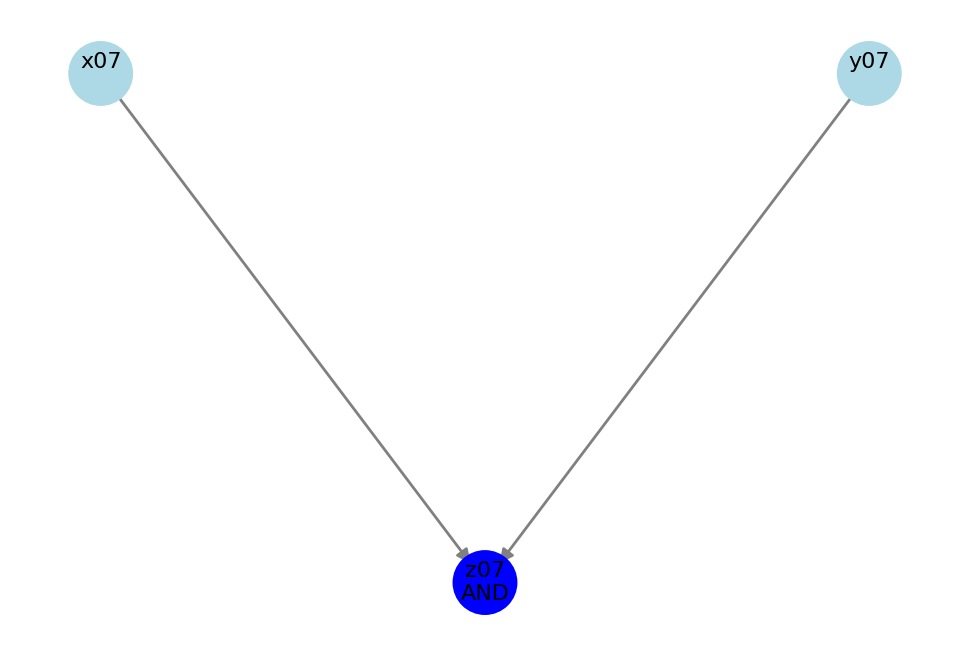

In [ ]:
draw_subgraph(full_graph, ancestors_of={'z07'}, figsize=(6, 4))

In [ ]:
draw_subgraph(full_graph, ancestors_of={'z13'})

<ipython-input-1-aa7f88a57e77>:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subG, prog="dot")


In [ ]:
draw_subgraph(full_graph, ancestors_of={'z24'})

<ipython-input-1-aa7f88a57e77>:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subG, prog="dot")


In [ ]:
draw_subgraph(full_graph, ancestors_of={'z31'})

<ipython-input-1-aa7f88a57e77>:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(subG, prog="dot")


In [ ]:
def solve_part2():
    swaps = {('z07', 'swt'), ('z13', 'pqc'), ('rjm', 'wsv'), ('bgs', 'z31')}
    wrong_bits = search_wrong_output_bits(full_graph, swaps=swaps)
    assert len(wrong_bits) == 0

    return ','.join(sorted([s[0] for s in swaps] + [s[1] for s in swaps]))

solve_part2()

'bgs,pqc,rjm,swt,wsv,z07,z13,z31'